The goal point will be (10, 10) and the goal orientation will be 2

iterations:  0 velocity:  0.009181227001493708 omega:  0.3204964456523895
iterations:  1 velocity:  0.009703628557176842 omega:  0.1918742231908644
iterations:  2 velocity:  0.009575903826924904 omega:  0.13499111034460995
iterations:  3 velocity:  0.009609206973247904 omega:  0.09965843482070467
iterations:  4 velocity:  0.010023290763878876 omega:  0.07476410586815163
iterations:  5 velocity:  0.0108338772774528 omega:  0.05626853304251564
iterations:  6 velocity:  0.011972782377934922 omega:  0.04221916322790496
iterations:  7 velocity:  0.013348269972608216 omega:  0.031453618562669
iterations:  8 velocity:  0.01487460006853247 omega:  0.023175525497727605
iterations:  9 velocity:  0.01648318731990073 omega:  0.01679612514876575
iterations:  10 velocity:  0.018123920001597366 omega:  0.01186611533209242
iterations:  11 velocity:  0.019762283557362235 omega:  0.00803973589517908
iterations:  12 velocity:  0.02137542637451022 omega:  0.00505132952338589
iterations:  13 velocity:  0.0

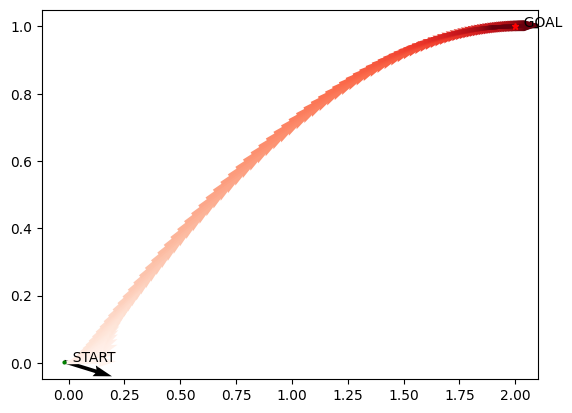

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# def drawCoodinate(size, ax):
#     x = np.linspace(-size,size-1,size)
#     y = np.linspace(-size,size-1,size)
#     u = np.zeros((size,size))
#     v = np.zeros((size,size))
#     plt.axis('equal')
#     ax.quiver(x, y, u, v, scale=1, units='xy')

# # Creates axes of plot referenced 'ax'
# ax = plt.axes()
# size = 20
# # drawCoodinate(size, ax)

scale = 5

desired_arr = np.zeros((1, 3))
state_arr = np.zeros((2, 3))
diff_arr = np.zeros((1, 3))

desired_arr[0] = [2., 1., 0.]                             # The goal
# desired_arr[0] = [10., 10., 0.]   
state_arr[1] = [-0.01897712, 0.00382164, -0.29991484]   # The initial state
diff_arr = np.zeros((1, 3))
velocity = 0.0
omega = 0.0
sampling_freq = 1  #Hz

# constants (success)
# k1 = 16e-4      # speed
# k2 = 8e-3       # trajectory

# k1 = 80e-4      # speed
# k2 = 5*k1       # trajectory

k1 = 400e-4      # speed
k2 = 5*k1      # trajectory

# plot the desired state
plt.quiver(desired_arr[0][0], desired_arr[0][1], np.cos(desired_arr[0][2]), np.sin(desired_arr[0][2]), scale=scale, units='xy')
plt.plot(desired_arr[0][0], desired_arr[0][1], marker="*", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.text(desired_arr[0][0], desired_arr[0][1], '  GOAL')

numIterations = 100
## Here starts the loop
for iteration in range(numIterations):
    # calculate the difference
    for j in range(3):
        diff_arr[0][j] = (state_arr[1][j] - desired_arr[0][j])
    
    z1 = diff_arr[0][2]
    z2 = diff_arr[0][0]*np.cos(diff_arr[0][2]) + diff_arr[0][1]*np.sin(diff_arr[0][2])
    z3 = diff_arr[0][0]*np.sin(diff_arr[0][2]) - diff_arr[0][1]*np.cos(diff_arr[0][2])
    
    x1 = z1
    x2 = z2
    x3 = -2*z3+z1*z2
    
    u1 = -k1*x1 + ((k2*x3)/(x1**2+x2**2))*x2
    u2 = -k1*x2 - ((k2*x3)/(x1**2+x2**2))*x1
    
    omega = u1
    # get start from zero velocity
    if iteration <= 50:
        velocity = ((iteration+1)/(50+5))*(u2 + z3*u1)
    else:
        velocity = 1*(u2 + z3*u1)   # the linear velocoty of the robot

    # plot the starting point
    if iteration == 0:
        plt.quiver(state_arr[1][0], state_arr[1][1], np.cos(state_arr[1][2]), np.sin(state_arr[1][2]), scale=scale, units='xy')
        plt.plot(state_arr[1][0], state_arr[1][1], marker="o", markersize=2, markeredgecolor="green", markerfacecolor="green")
        plt.text(state_arr[1][0], state_arr[1][1], '  START')

    if velocity < 0:
        state_arr[1][2] += np.pi/2.    # if the velocity is negative, turn around
        continue

    # print velocity
    if iteration % 1 == 0:
        print("iterations: ", iteration, "velocity: ", velocity, "omega: ", omega)
    
    # update the information of the next state #
    state_arr[0][0] = state_arr[1][0] + velocity*np.cos(state_arr[1][2]) *(1.0/sampling_freq)
    state_arr[0][1] = state_arr[1][1] + velocity*np.sin(state_arr[1][2]) *(1.0/sampling_freq)
    state_arr[0][2] = state_arr[1][2] + omega *(1.0/sampling_freq)
    # update the information of the next state #
    
    # plot the current status
    plt.quiver(state_arr[0][0], state_arr[0][1], 1*np.cos(state_arr[0][2]), 1*np.sin(state_arr[0][2]), scale=scale, units='xy', color=plt.cm.Reds((iteration+1)/numIterations))
    
    # clear the old information
    for i in range(3):
        state_arr[1][i] = state_arr[0][i]


